In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Perceptron
import cv2
from random import randint
import os

cm = 2.4

pd.options.display.max_columns = 250 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 250 #Changes the number of rows diplayed (default is 60)
pd.options.display.max_colwidth = 250 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

Getting data for:  circle
Getting data for:  square
Getting data for:  triangle
Getting data for:  star


(14970,)

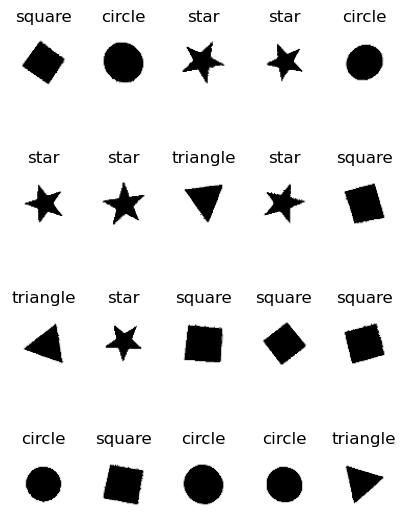

In [10]:
PATH = r'data/four-shapes/shapes/'
IMG_SIZE = 64
shapes = ["circle", "square", "triangle", "star"]
labels = []
dataset = []

for shape in shapes:
    print("Getting data for: ", shape)
    #iterate through each file in the folder
    for path in os.listdir(PATH + shape):
        #add the image to the list of images
        image = cv2.imread(PATH + shape + '/' + path)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image = image.reshape(12288)
        dataset.append(image)
        labels.append(shapes.index(shape))
        
        
index = np.random.randint(0, len(dataset) - 1, size= 20)
plt.figure(figsize=(5,7))
 
for i, ind in enumerate(index, 1):
    img = dataset[ind].reshape((64, 64, 3))
    lab = shapes[labels[ind]]
    plt.subplot(4, 5, i)
    plt.title(lab)
    plt.axis('off')
    plt.imshow(img)
    
    
X = np.array(dataset)
X.shape
 
y=np.array(labels)
y.shape

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

perceptron = Perceptron(max_iter = 100, shuffle=True, fit_intercept=True)
perceptron.fit(X_train,y_train)

y_pred = perceptron.predict(X_test)

perceptron.score(X_test,y_test)

0.988309953239813

/var/folders/gn/kx6xc1f932v5jmzl00v_j81c0000gn/T/ipykernel_7639/3623540420.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,20))


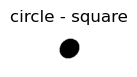

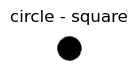

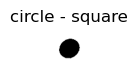

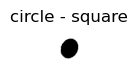

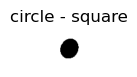

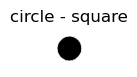

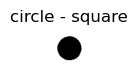

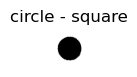

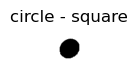

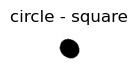

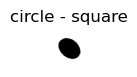

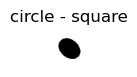

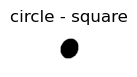

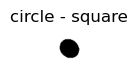

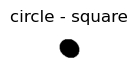

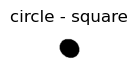

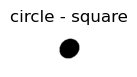

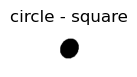

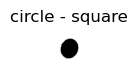

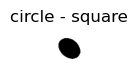

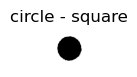

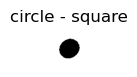

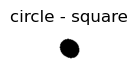

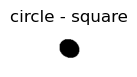

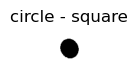

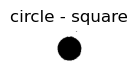

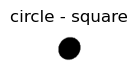

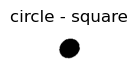

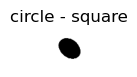

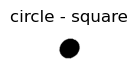

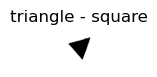

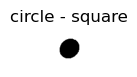

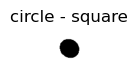

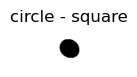

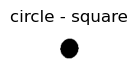

In [19]:
bad_results = [(a,b,c) for (a,b,c) in zip(X_test[y_test != y_pred], 
                                          y_test[y_test != y_pred],
                                          y_pred[y_test != y_pred] )]
len(bad_results)


i=1
for x_test, y_test, y_pred in bad_results:
    img = x_test.reshape((64, 64, 3))
    label_test = shapes[y_test]
    label_pred = shapes[y_pred]
    plt.figure(figsize=(20,20))
    plt.subplot(len(bad_results), 1, i)
    plt.title(label_test +' - '+ label_pred)
    plt.axis('off')
    plt.imshow(img)
    i+=1
    
    
    
# idx = randint(0,y_pred.size)
# plt.title(shapes[y_pred[idx]])
# plt.imshow(X_test[idx].reshape((64,64,3)))